In [1]:
import numpy as np
import import_ipynb
from IPython.display import clear_output
#import time

import triangle_fitness_function as ff

In [2]:
class Genetic_Algorithm:
    def __init__(
        self,
        n_genes,
        n_alleles,
        scale,
        offset,
        size_population,
        generations,
        pm,
        min_fitness_value=0.0,
        show_output=True
    ):
        self.n_genes = n_genes
        self.n_alleles = n_alleles
        self.total_alleles = self.n_alleles * self.n_genes
        self.scale = scale
        self.offset = offset
        self.size_population = size_population
        self.chromosomes = []
        self.fitness = []
        self.generations = generations
        self.pm = pm
        self.min_fitness_value = min_fitness_value
        self.show_output = show_output
    
    def init_population(self):
        self.chromosomes = np.array([[1 if np.random.rand() > 0.5 else 0 for j in range(self.total_alleles)]for i in range(self.size_population) ])
        self.fitness = np.array([ff.fitness_evaluation(self.chromosomes[i], self.n_genes, self.n_alleles, self.scale, self.offset)
                        for i in range(self.size_population)])
    
    def sort_population(self):
        id = np.argsort(self.fitness, axis=0).squeeze()
        self.fitness = self.fitness[id]
        self.chromosomes = self.chromosomes[id]

    def random_selection(self):        
        parents_index = np.random.randint(0, self.size_population, 2)
        return parents_index
    
    def roulette_wheel_selection(self):
        i = 0
        prob_population = 1/(1 + (self.fitness) - self.min_fitness_value)
        prob_population_sum = np.sum(prob_population)
        prob_ind_i = prob_population[i]/prob_population_sum
        sum = prob_ind_i
        r = np.random.rand()
        while sum <= r:
            i += 1
            prob_ind_i = prob_population[i]/prob_population_sum
            sum += prob_ind_i
        return i
    
    def tournament_selection(self, tournament_size=3):
        pass
    
    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(0, self.total_alleles)
        offspring = []
        offspring.append(np.concatenate((parent1[0:crossover_point], parent2[crossover_point:])))
        offspring.append(np.concatenate((parent2[0:crossover_point], parent1[crossover_point:])))
        offspring = np.array(offspring)
        return offspring
    
    def uniform_mutation(self, chromosome):
        mutated_chromosomes = [
            not(chromosome[i]) if np.random.rand() <= self.pm else chromosome[i] for i in range(self.total_alleles)
        ]
        return np.array(mutated_chromosomes)
    
    def start(self):
        np.random.seed(0)
        self.init_population()
        generation_counter = 0
        self.sort_population()
        
        array_best_fitness = [self.fitness[0][0]]
        array_worst_fitness = [self.fitness[-1][0]]
        
        while generation_counter < self.generations:
            id_parent1 = self.roulette_wheel_selection()
            id_parent2 = self.roulette_wheel_selection()
            offspring = self.crossover(
                self.chromosomes[id_parent1],
                self.chromosomes[id_parent2]
            )
            offspring_mutated = np.array([self.uniform_mutation(offspring[i]) for i in range(2)])
            self.chromosomes = np.vstack((self.chromosomes, offspring_mutated))
            offspring_fitness = np.array([ff.fitness_evaluation(offspring_mutated[i], self.n_genes, self.n_alleles, self.scale, self.offset) for i in range(2)])
            self.fitness = np.vstack((self.fitness, offspring_fitness))
            self.sort_population()
            self.chromosomes = self.chromosomes[0:self.size_population]
            self.fitness = self.fitness[0:self.size_population]
            generation_counter += 1
            best_fitness = self.fitness[0][0]
            worst_fitness = self.fitness[-1][0]
            array_best_fitness.append(best_fitness)
            array_worst_fitness.append(worst_fitness)
            if generation_counter % (self.generations//10) == 0 and self.show_output:
                clear_output(wait=True)
                #time.sleep(0.1)
                print(f"Generation {generation_counter}: Best fitness = {best_fitness:.2f}, Worst fitness = {worst_fitness:.2f}")
        
        ff.final_result(
            self.chromosomes[0],
            array_best_fitness,
            array_worst_fitness,
            self.n_genes,
            self.n_alleles,
            self.scale,
            self.offset
        )

Generation 10000: Best fitness = 0.00, Worst fitness = 0.00
########################################################################
#
# GENETIC ALGORITHM RESULTS
#   Best fitness: 0.0006746066441185583
#   Best candidate solution: [2.322 4.348]
#
# DESIRED VALUES
#   Desired Perimeter (PD): 11.5988
#   Desired Area (AD): 5.049
#
# OBTAINED VALUES
#   Cathetus 1 (c1): 2.322
#   Cathetus 2 (c2): 4.348
#   Hypotenuse (h): 4.929177213288238
#   Obtained Perimeter (P): 11.599177213288238
#   Obtained Area (A): 5.048028
#
# ERRORS
#   Perimeter Error (Ep): 0.00037721328823714373
#   Area Error (Ea): 0.0009719999999999729
#   Total Error: 0.0006746066441185583
#
########################################################################


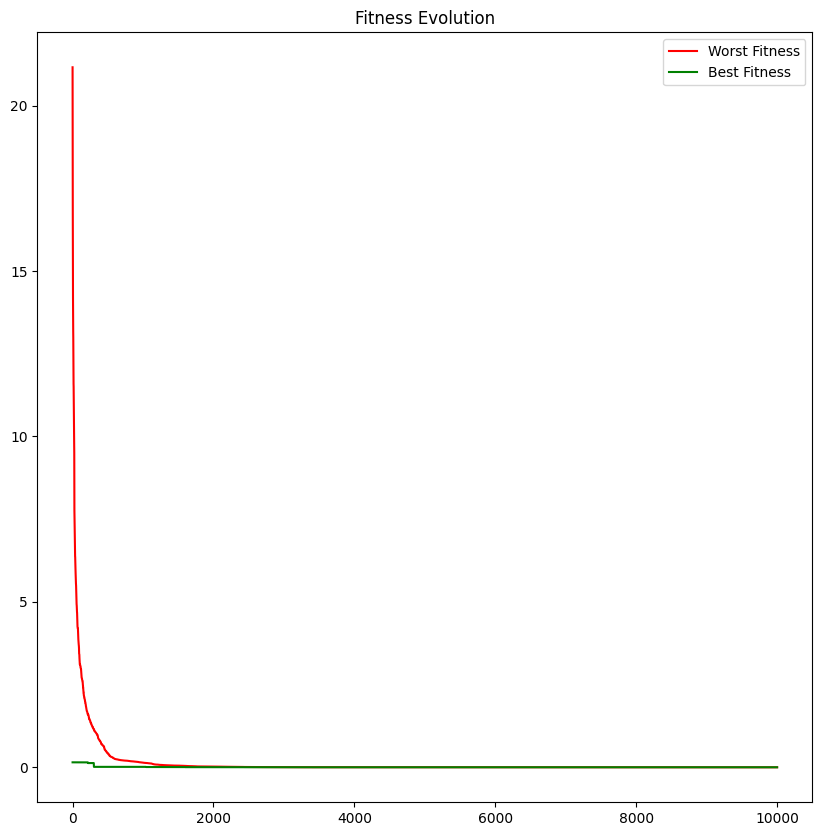

In [3]:
Genetic_Algorithm1 = Genetic_Algorithm(
    n_genes=2,
    n_alleles=13,
    scale=1000,
    offset=0,
    size_population=200,
    generations=10000,
    pm=0.04,
)

Genetic_Algorithm1.start()